In [1]:
from os import listdir
from matplotlib import image
import random
import numpy as np 
from dataclasses import dataclass

# load images in a directory 
random.seed(1)
random_indexes = random.sample(range(25000), 250)
loaded_images = list()
for i in range(250):
	# load image
	filename = 'im' + str(random_indexes[i]) + '.jpg'
	img_data = image.imread('Q:/mirflickr25k/mirflickr/' + filename)
	# store loaded image
	loaded_images.append(img_data)
	print('> loaded %s %s' % (filename, img_data.shape))

> loaded im4402.jpg (248, 500, 3)
> loaded im18651.jpg (333, 500, 3)
> loaded im2067.jpg (500, 333, 3)
> loaded im8358.jpg (333, 500, 3)
> loaded im3863.jpg (333, 500, 3)
> loaded im16234.jpg (500, 500, 3)
> loaded im24935.jpg (500, 331, 3)
> loaded im14728.jpg (333, 500, 3)
> loaded im15474.jpg (375, 500, 3)
> loaded im21351.jpg (500, 375, 3)
> loaded im12439.jpg (367, 500, 3)
> loaded im6879.jpg (500, 445, 3)
> loaded im3075.jpg (333, 500, 3)
> loaded im15986.jpg (338, 450, 3)
> loaded im928.jpg (332, 500, 3)
> loaded im12773.jpg (500, 493, 3)
> loaded im14180.jpg (333, 500, 3)
> loaded im19904.jpg (333, 500, 3)
> loaded im24978.jpg (352, 500, 3)
> loaded im69.jpg (377, 500, 3)
> loaded im22801.jpg (500, 352, 3)
> loaded im14594.jpg (334, 500, 3)
> loaded im8727.jpg (375, 500, 3)
> loaded im23643.jpg (363, 500, 3)
> loaded im7496.jpg (333, 500, 3)
> loaded im19370.jpg (310, 500, 3)
> loaded im3349.jpg (375, 500, 3)
> loaded im10401.jpg (375, 500, 3)
> loaded im1002.jpg (326, 500, 3)


In [2]:
values = np.zeros((3, 256))
index = 0
for image in loaded_images:
	for i in range(image.shape[0]):
		for j in range(image.shape[1]):
			values[0][image[i][j][0]] += 1
			values[1][image[i][j][1]] += 1
			values[2][image[i][j][2]] += 1
	index += 1
	if (index % 10) == 0:
		print('> processed %i images' % (index))

> processed 10 images
> processed 20 images
> processed 30 images
> processed 40 images
> processed 50 images
> processed 60 images
> processed 70 images
> processed 80 images
> processed 90 images
> processed 100 images
> processed 110 images
> processed 120 images
> processed 130 images
> processed 140 images
> processed 150 images
> processed 160 images
> processed 170 images
> processed 180 images
> processed 190 images
> processed 200 images
> processed 210 images
> processed 220 images
> processed 230 images
> processed 240 images
> processed 250 images


In [3]:
RED = 0
GREEN = 1
BLUE = 2
# Expected value & Variance
#RED
sum_val = sum(values[RED])
M_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    M_red += p * index
D_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    D_red += p * ((index - M_red) ** 2)
print("Red: Expected value - {0:.2f}, Variance - {1:.2f}"\
.format(M_red, D_red))

#GREEN
sum_val = sum(values[GREEN])
M_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    M_green += p * index
D_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    D_green += p * ((index - M_green) ** 2)
print("Green: Expected value - {0:.2f}, Variance - {1:.2f}"\
.format(M_green, D_green))
    
#BLUE
sum_val = sum(values[BLUE])
M_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    M_blue += p * index
D_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    D_blue += p * ((index - M_blue) ** 2)
print("Blue: Expected value - {0:.2f}, Variance - {1:.2f}"\
.format(M_blue, D_blue))

Red: Expected value - 113.95, Variance - 5852.65
Green: Expected value - 107.31, Variance - 5392.78
Blue: Expected value - 99.49, Variance - 5774.33


In [4]:
def E_operator(arr_values, M, power):
    sum_val = sum(arr_values)
    ans = 0
    for index in range(len(arr_values)):
        p = (arr_values[index] / sum_val)
        ans += p * ((index - M) ** power)
    return ans
        
#Asymmetry and excess
Asym_red = E_operator(values[RED], M_red, 3) / (D_red ** (3 / 2))
Asym_green = E_operator(values[GREEN], M_green, 3) / (D_green ** (3 / 2))
Asym_blue = E_operator(values[BLUE], M_blue, 3) / (D_blue ** (3 / 2))

Excess_red = E_operator(values[RED], M_red, 4) / (D_red ** 2)
Excess_green = E_operator(values[GREEN], M_green, 4) / (D_green ** 2)
Excess_blue = E_operator(values[BLUE], M_blue, 4) / (D_blue ** 2)
print('Red: Asymmetry - {0:.3f}, Excess - {1:.3f}'\
.format(Asym_red, Excess_red))
print('Green: Asymmetry - {0:.3f}, Excess - {1:.3f}'\
.format(Asym_green, Excess_green))
print('Blue: Asymmetry - {0:.3f}, Excess - {1:.3f}'\
.format(Asym_blue, Excess_blue))

Red: Asymmetry - 0.174, Excess - 1.853
Green: Asymmetry - 0.275, Excess - 1.994
Blue: Asymmetry - 0.425, Excess - 2.024


In [6]:
#3. Gethering info vectors
Vector_A = np.array([np.array([M_red, D_red, Asym_red, Excess_red]),
                     np.array([M_green, D_green, Asym_green, Excess_green]),
                     np.array([M_blue, D_blue, Asym_blue, Excess_blue])])
print("Vector_A:\n" + str(Vector_A))
Vector_All_DATA = np.copy(Vector_A)
itear = 0
for image in loaded_images:
    image = np.reshape(image, (-1, 3))
    image = np.swapaxes(image, 0, 1)
    Vector_All_DATA = np.concatenate((Vector_All_DATA,image),axis=1)
    itear += 1
    if (itear % 10 == 0):
        print(str(itear) + " img")

Vector_A:
[[1.13946581e+02 5.85265242e+03 1.73982067e-01 1.85309506e+00]
 [1.07313605e+02 5.39277757e+03 2.75405534e-01 1.99447289e+00]
 [9.94871271e+01 5.77433321e+03 4.25110161e-01 2.02427163e+00]]
10 img
20 img
30 img
40 img
50 img
60 img
70 img
80 img
90 img
100 img
110 img
120 img
130 img
140 img
150 img
160 img
170 img
180 img
190 img
200 img
210 img
220 img
230 img
240 img
250 img


In [8]:
#4. Gaussian models

#a Expected value
P_x1 = np.random.normal(M_red, D_red, 1)
print("Expected value + colors:\n" + str(P_x1))

#b Expected value and dispersion
P_x2 = np.cov(Vector_All_DATA)
print("Expected value + dispersion + colors:\n" + str(P_x2[:2, :2]))

#c Expected value, dispersion and asymetry
print("Expected value + dispersion + asymetry + colors:\n" + str(P_x2[:3, :3]))

#d Expected value, dispersion, asymetry and excess
print("Expected value + dispersion + asymetry + excess + colors:\n" + str(P_x2[:4, :4]))

Expected value + colors:
[2077.79126664]
Expected value + dispersion + colors:
[[5853.39076062 5075.84012833]
 [5075.84012833 5393.40387733]]
Expected value + dispersion + asymetry + colors:
[[5853.39076062 5075.84012833 4529.96354074]
 [5075.84012833 5393.40387733 5112.40411108]
 [4529.96354074 5112.40411108 5775.05507684]]
Expected value + dispersion + asymetry + excess + colors:
[[5853.39076062 5075.84012833 4529.96354074]
 [5075.84012833 5393.40387733 5112.40411108]
 [4529.96354074 5112.40411108 5775.05507684]]


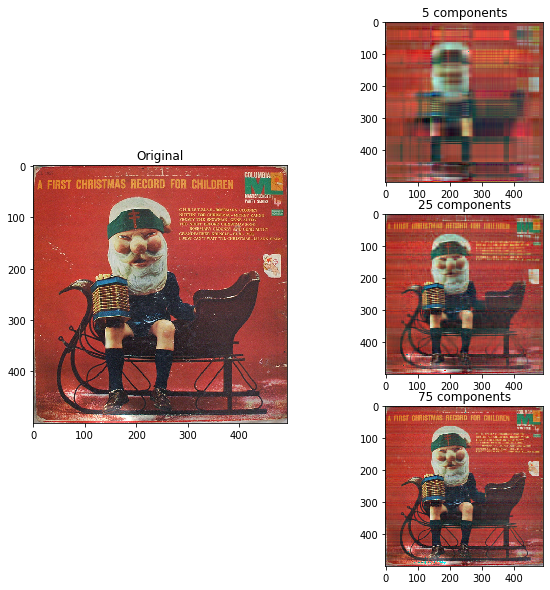

In [25]:
#5. a.Restoring using PCA
import scipy
import scipy.ndimage
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image

test_img = loaded_images[15]
a_np = np.array(test_img)
a_r = a_np[:,:,0]
a_g = a_np[:,:,1]
a_b = a_np[:,:,2]

def PCA_2d(image_2d, numpc):
	cov_mat = image_2d - np.mean(image_2d)
	eig_val, eig_vec = np.linalg.eigh(np.cov(cov_mat))
	p = np.size(eig_vec, axis =1)
	idx = np.argsort(eig_val)
	idx = idx[::-1]
	eig_vec = eig_vec[:,idx]
	eig_val = eig_val[idx]
    
	if numpc <p or numpc >0:
		eig_vec = eig_vec[:, range(numpc)]
	score = np.dot(eig_vec.T, cov_mat)
	recon = np.dot(eig_vec, score) + np.mean(image_2d).T
	recon_img_mat = np.uint8(np.absolute(recon))
	return recon_img_mat

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 5), PCA_2d(a_g, 5), PCA_2d(a_b, 5)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.title('Original')
plt.imshow(loaded_images[15])
fig.add_subplot(3, 2, 2)
plt.title('5 components')
plt.imshow(recon_color_img)

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 25), PCA_2d(a_g, 25), PCA_2d(a_b, 25)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig.add_subplot(3, 2, 4)
plt.title('25 components')
plt.imshow(recon_color_img)

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 75), PCA_2d(a_g, 75), PCA_2d(a_b, 75)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig.add_subplot(3, 2, 6)
plt.title('75 components')
plt.imshow(recon_color_img)
plt.show()
# recon_color_img = Image.fromarray(recon_color_img)
# recon_color_img.show()

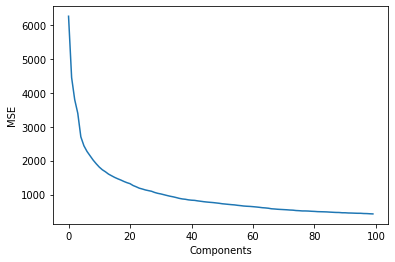

In [23]:
# b.calculating MSE
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    return err

mse_list = list()
for i in range(100):
    a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, i), PCA_2d(a_g, i), PCA_2d(a_b, i)
    recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
    mse_list.append(mse(test_img, recon_color_img))
plt.plot(range(len(mse_list)),mse_list)
plt.xlabel("Components")
plt.ylabel("MSE")
plt.show()

In [20]:
#6 Markov chain:

markov_matrix1 = np.zeros(shape=(256, 256))
#c-type
arr = a_r.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix1[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix1[0] / sum(markov_matrix1[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix1[i] / sum(markov_matrix1[i])))
print("Red matrix 1st oder:\n", markov_matrix)
print("\nRed matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

markov_matrix1 = np.zeros(shape=(256, 256))
#Fortran-type
arr = a_r.flatten('F')
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix1[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix1[0] / sum(markov_matrix1[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix1[i] / sum(markov_matrix1[i])))
print("Red matrix 2-nd type 1st oder:\n", markov_matrix)
print("\nRed matrix 2-nd type 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

markov_matrix2 = np.zeros(shape=(256, 256))
arr = a_g.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix2[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix2[0] / sum(markov_matrix2[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix2[i] / sum(markov_matrix2[i])))
print("\n\nGreen matrix 1st oder:\n", markov_matrix)
print("\nGreen matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

markov_matrix3 = np.zeros(shape=(256, 256))
arr = a_g.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix3[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix3[0] / sum(markov_matrix3[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix3[i] / sum(markov_matrix3[i])))
print("\n\nBlue matrix 1st oder:\n", markov_matrix)
print("\nBlue matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

Red matrix 1st oder:
 [[9.51776370e-01 1.51104793e-02 7.64715254e-03 ... 0.00000000e+00
  0.00000000e+00 1.22550521e-05]
 [2.43978371e-01 5.19908242e-01 8.12715058e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.16963271e-01 2.46118894e-01 2.33623627e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.45398773e-02
  7.97546012e-02 2.08588957e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.30337079e-02
  3.93258427e-02 1.85393258e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.26315789e-02
  7.96992481e-02 2.10526316e-01]]

Red matrix 2nd order:
 [[9.14623939e-01 2.61118165e-02 1.22157072e-02 ... 6.37220207e-06
  6.23779767e-06 4.35394545e-05]
 [4.01177159e-01 3.08504655e-01 7.74124593e-02 ... 1.33926820e-05
  1.36395772e-05 9.69373804e-05]
 [3.69260390e-01 2.19891624e-01 1.07054735e-01 ... 2.83909767e-05
  2.55619422e-05 1.59582945e-04]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2

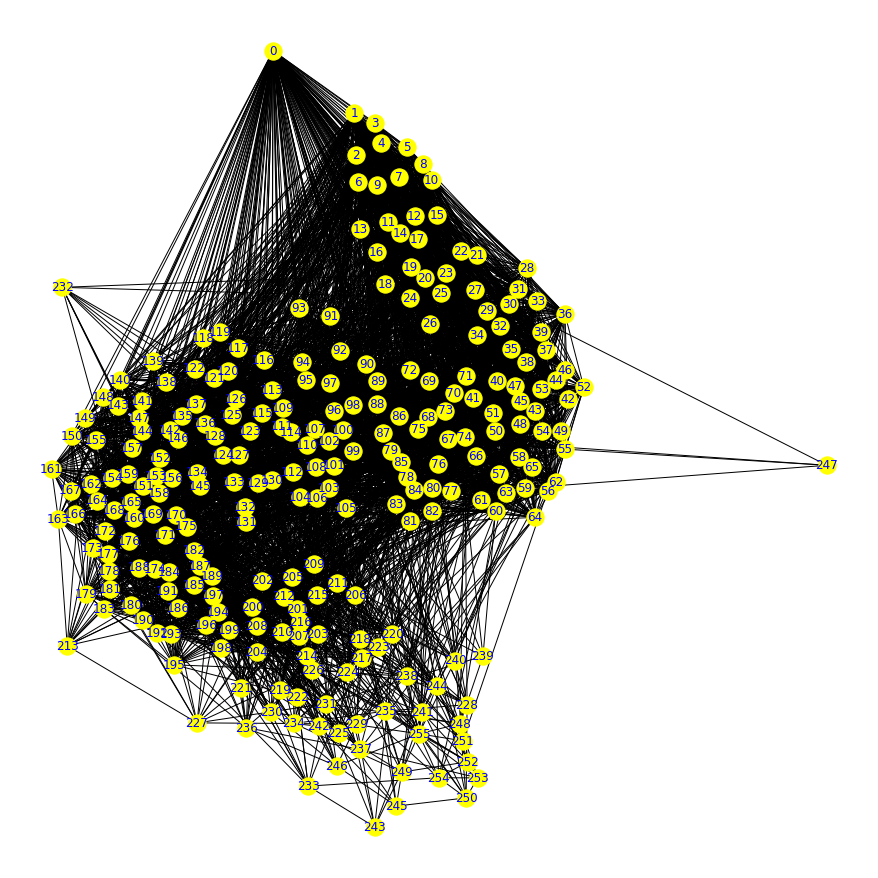

In [26]:
#Graph
import networkx as nx
import pandas as pd

data = markov_matrix
data = np.triu(data) + np.triu(data).T
ind = [str(i) for i in range(data.shape[0])]
df2 = pd.DataFrame(data, index=ind, columns=ind)
plt.figure(1,figsize=(12,12))  
G2 = nx.from_pandas_adjacency(df2)

nx.draw(G2, with_labels=True, node_color='yellow', font_color='blue')
plt.show()